In [18]:
# import relevant libraries
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('EUR_USD Consolidated Data.csv')

In [20]:
print(df.describe())
print(df.isnull().sum())

              Open         High          Low        Close    Adj Close  \
count  3516.000000  3516.000000  3516.000000  3516.000000  3516.000000   
mean      1.202199     1.206384     1.197765     1.202176     1.202176   
std       0.113999     0.114481     0.113623     0.113936     0.113936   
min       0.959619     0.967006     0.760572     0.959619     0.959619   
25%       1.112489     1.116000     1.108540     1.112520     1.112520   
50%       1.176416     1.179272     1.172828     1.176325     1.176325   
75%       1.306033     1.310099     1.300845     1.305905     1.305905   
max       1.484296     1.493808     1.480494     1.484406     1.484406   

           EUR I/R  US Fed Rate  US Headline CPI  US Core CPI  \
count  3516.000000  3516.000000      3516.000000  3516.000000   
mean      0.847341     0.787472       247.774096   252.071185   
std       0.854795     1.145665        22.084952    23.027558   
min       0.250000     0.045714       217.199000   220.633000   
25%     

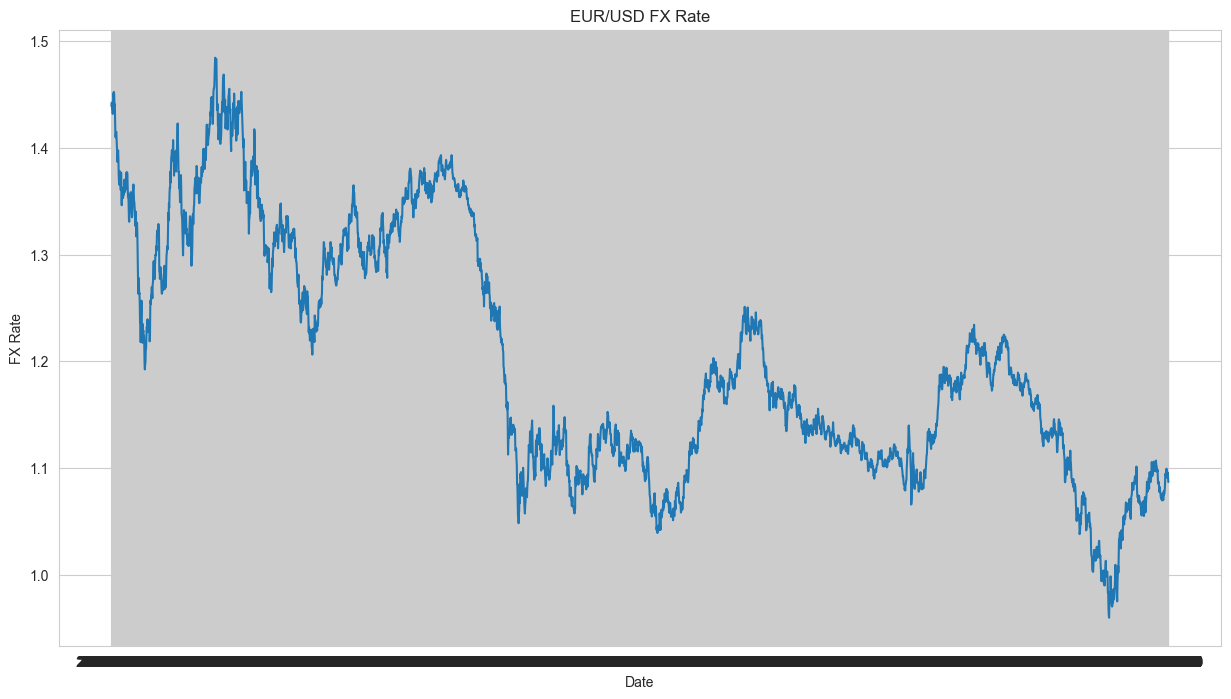

In [21]:
plt.figure(figsize=(15,8))
plt.plot(df['Date'], df['Adj Close'])
plt.title("EUR/USD FX Rate")
plt.xlabel("Date")
plt.ylabel("FX Rate")
plt.show()

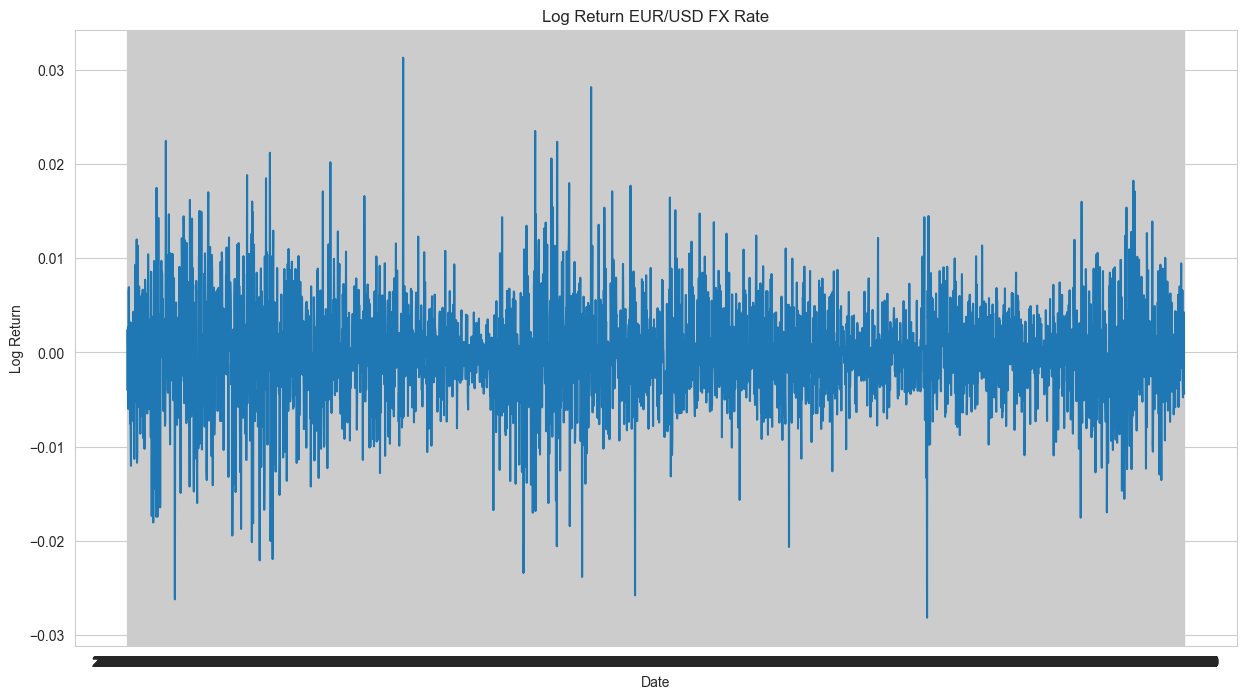

In [22]:
df['Log Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift())
plt.figure(figsize=(15,8))
plt.plot(df['Date'], df['Log Return'])
plt.title("Log Return EUR/USD FX Rate")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()

Text(0.5, 1.0, 'Log Return Distribution')

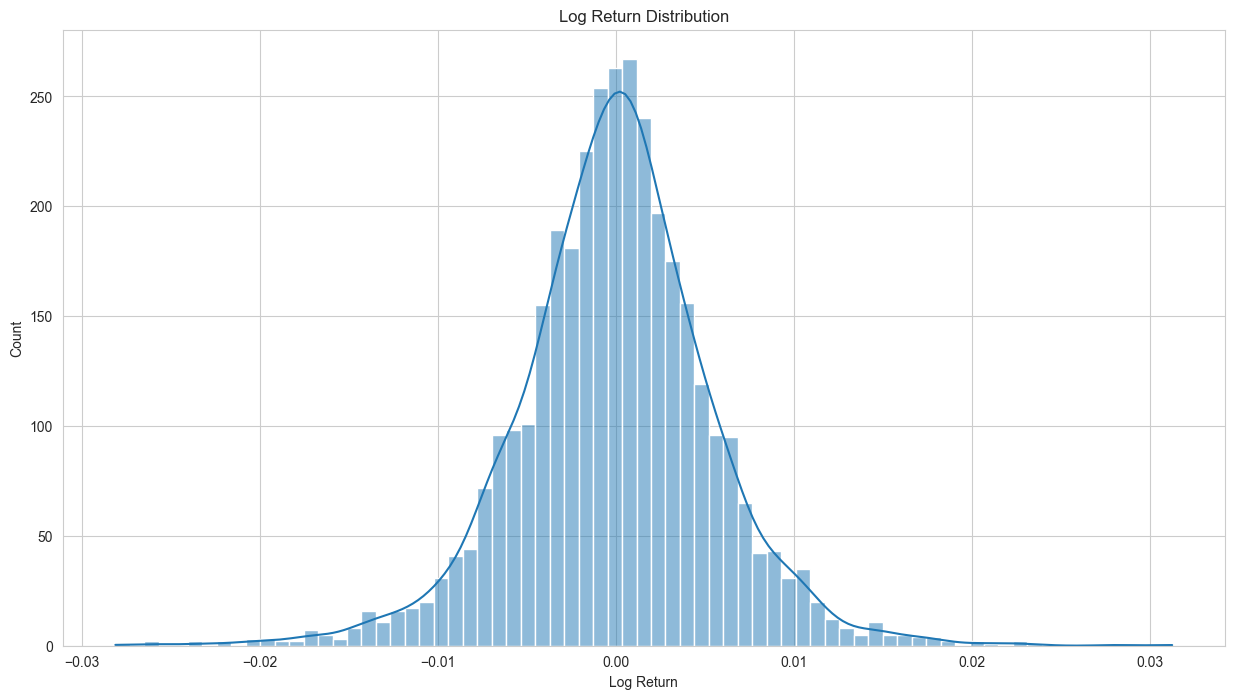

In [23]:
plt.figure(figsize=(15,8))
sns.histplot(df['Log Return'], kde=True)
plt.title("Log Return Distribution")

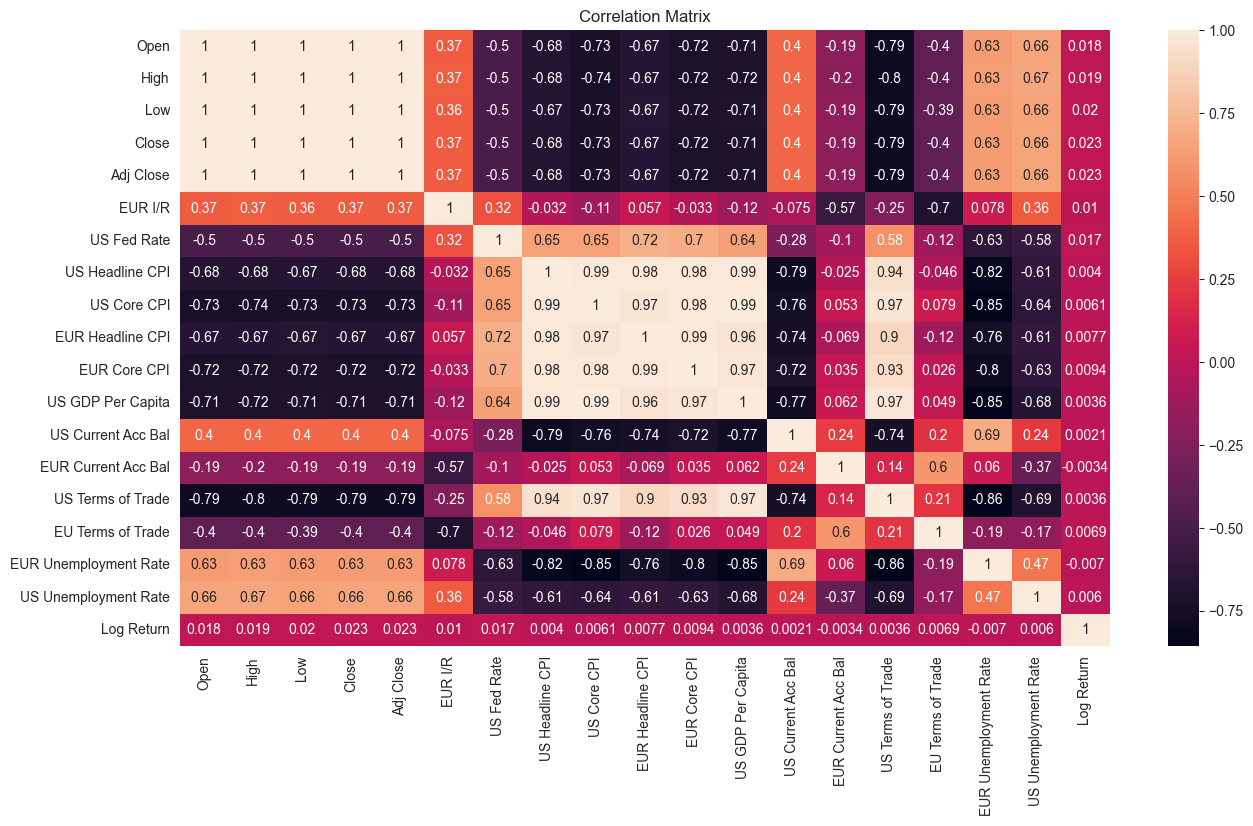

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [25]:
subset = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close']
subset2 = [col for col in df.columns if col not in subset]

In [26]:
# for y in subset2:
#     plt.figure(figsize=(15,8))
#     plt.plot(df['Date'], df[y])
#     plt.title(f"{y}")
#     plt.xlabel("Date")
#     plt.ylabel(f"{y}")
#     plt.show()

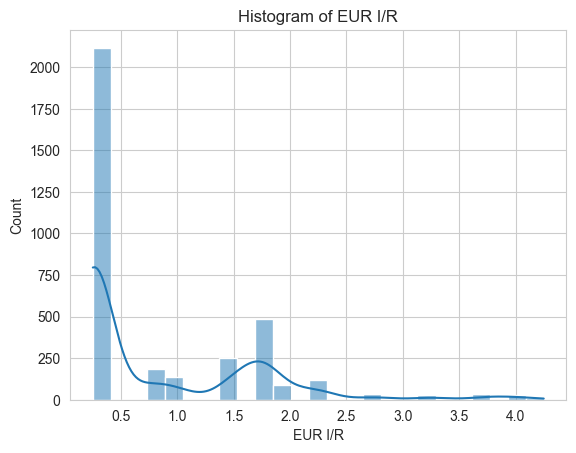

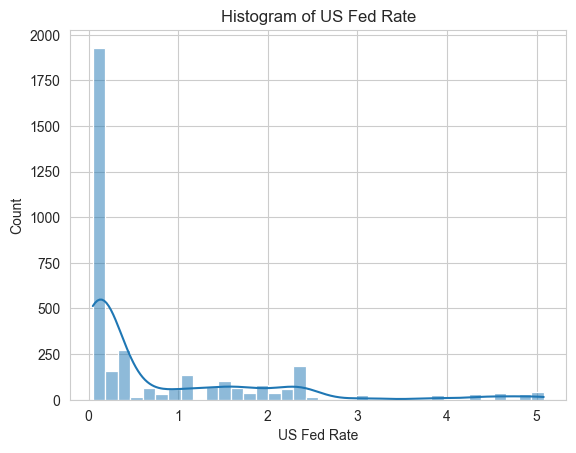

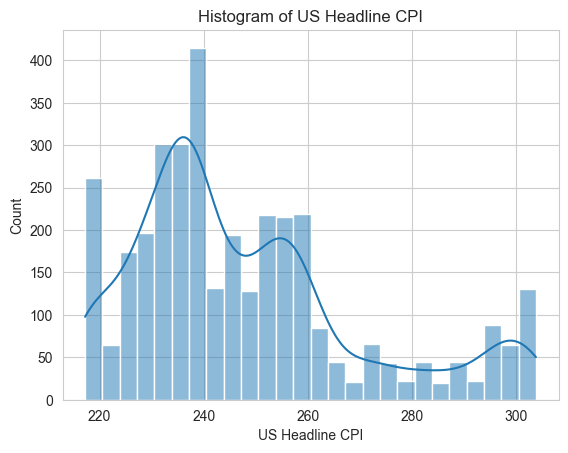

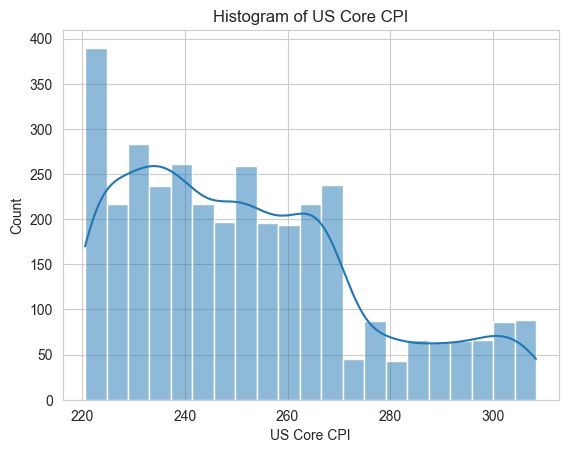

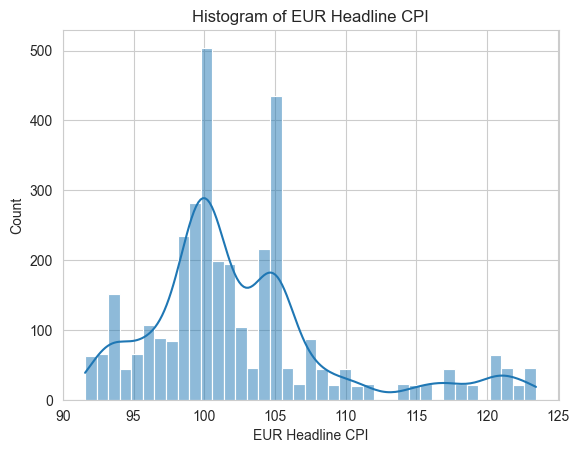

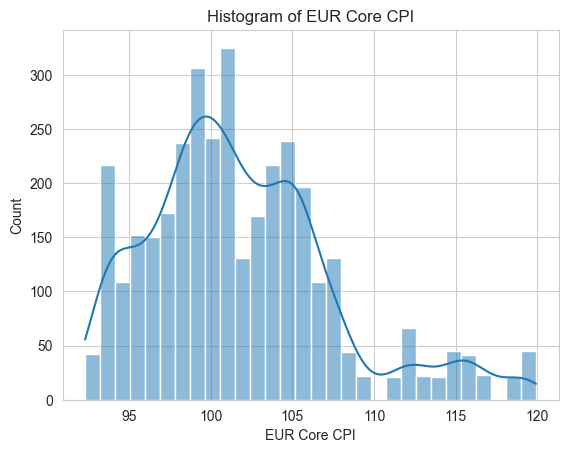

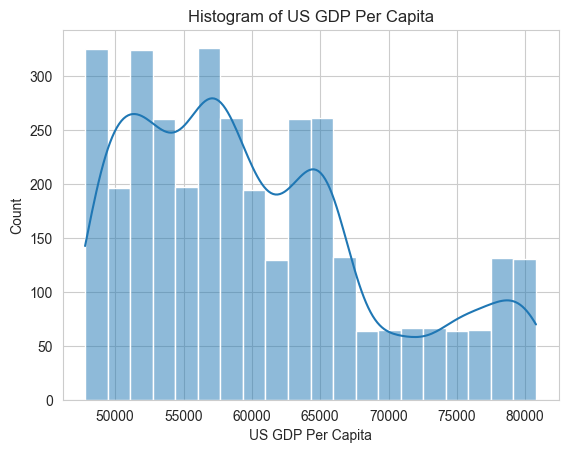

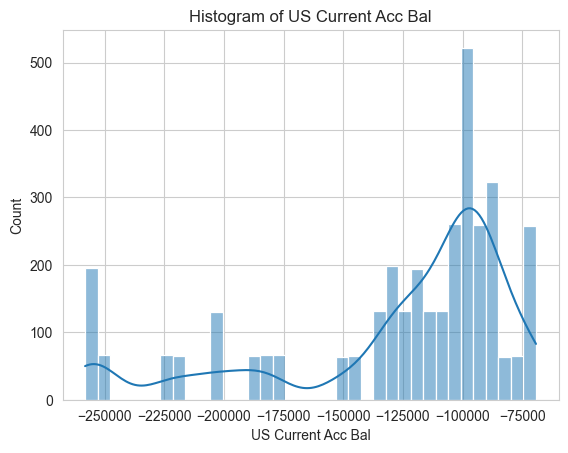

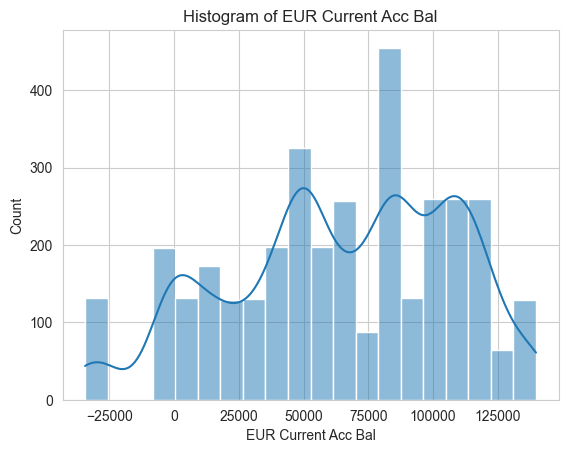

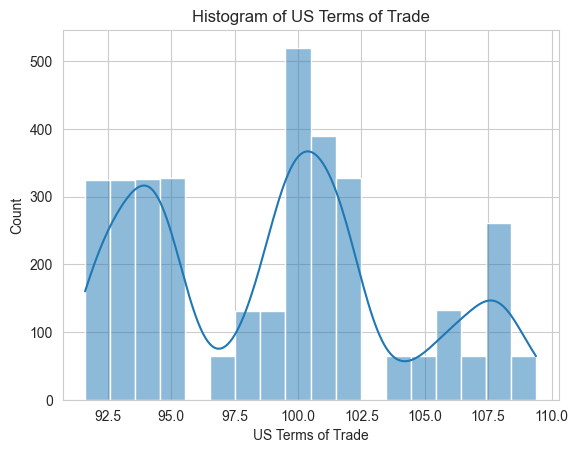

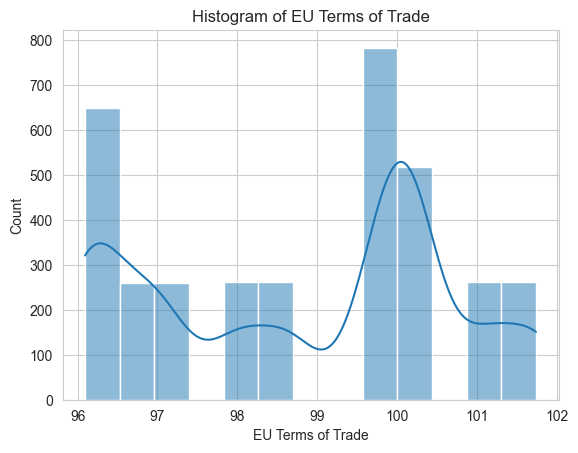

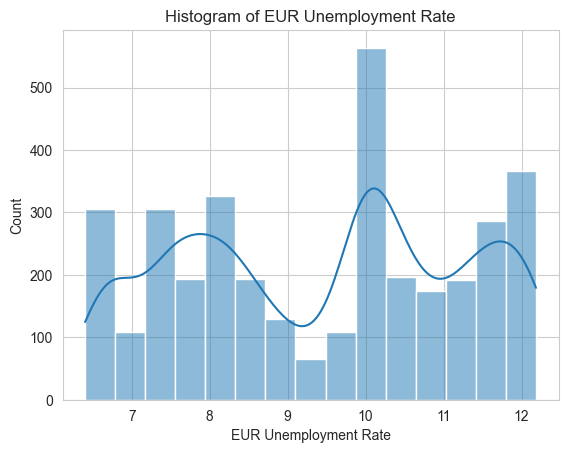

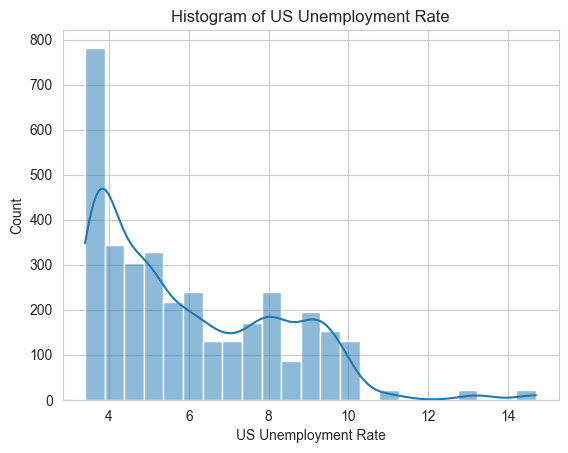

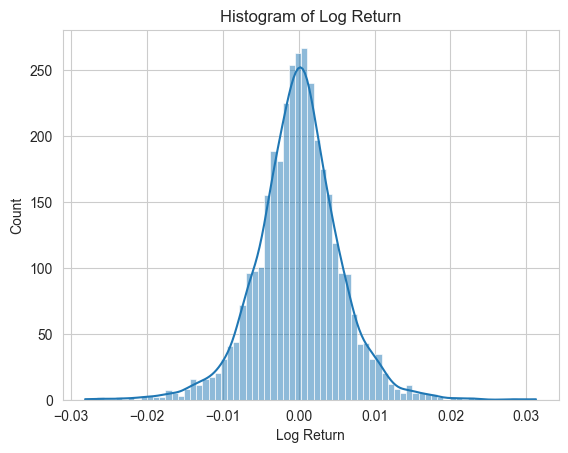

In [27]:
for i in df.columns:
    if i in subset:
        None
    else:
        sns.histplot(df[i], kde=True)
        plt.title(f"Histogram of {i}")
        plt.show()

In [28]:
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(x=df['Adj Close'], model=n, period=365)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(15, 8))
    plt.subplot(411)
    plt.plot(df['Adj Close'], label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
except ImportError:
    print("Statsmodels not installed. Skipping time series decomposition.")

NameError: name 'n' is not defined

In [ ]:
plt.figure(figsize=(15,8))
sns.pairplot(df[subset2])
plt.show()